<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/AirBNB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRBNB Explanatory Data Analysis

<hr>


In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Necessary packages included successfully!")

Necessary packages included successfully!


In [267]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/AB_NYC_2019.csv'
airbnb = pd.read_csv(url,error_bad_lines=False)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [268]:
r,c = airbnb.shape
print("Number of rows in dataset    = ",r)
print("Number of columns in dataset = ",c)

Number of rows in dataset    =  48895
Number of columns in dataset =  16


In [269]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [270]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [271]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [272]:
airbnb = airbnb.drop(['id','host_name','last_review'], axis=1)

In [273]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [274]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [275]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

In [276]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48879.0,6.763013e+07,7.862070e+07,2438.00000,7.816856e+06,3.079133e+07,1.074344e+08,2.743213e+08
latitude,48879.0,4.072894e+01,5.452918e-02,40.49979,4.069009e+01,4.072308e+01,4.076311e+01,4.091306e+01
longitude,48879.0,-7.395217e+01,4.615997e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393628e+01,-7.371299e+01
price,48879.0,1.527224e+02,2.401868e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48879.0,7.011027e+00,2.001600e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48879.0,2.328120e+01,4.455615e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48879.0,1.091248e+00,1.597433e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48879.0,7.145891e+00,3.295774e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48879.0,1.127890e+02,1.316133e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Text(0.5, 1.0, 'Correlation of the parameters\n')

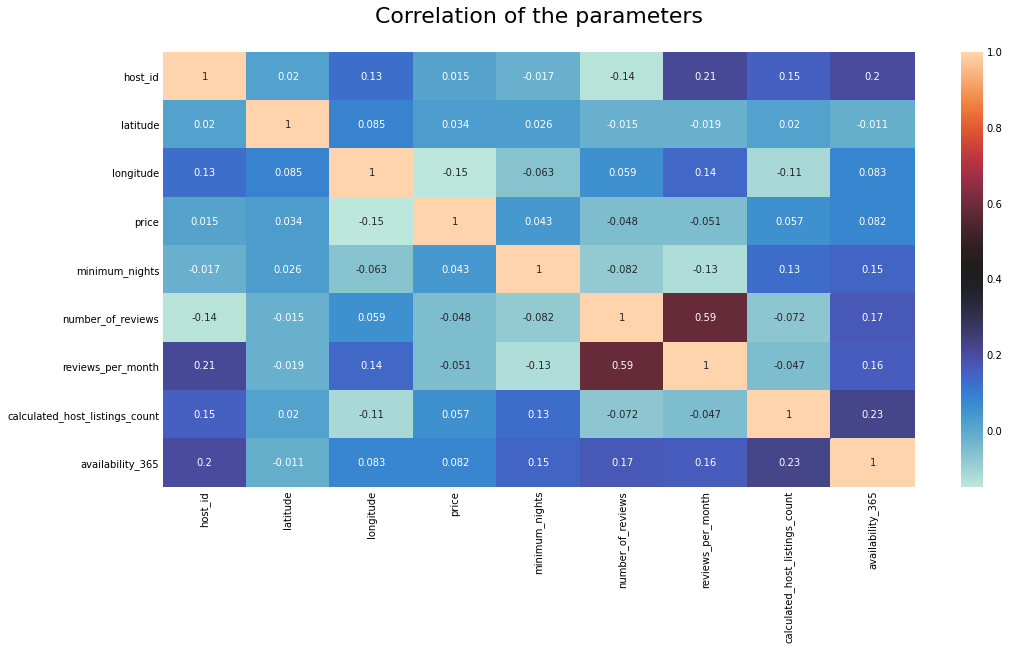

In [277]:
corr = airbnb.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,cmap= "icefire")
plt.title("Correlation of the parameters\n",size=22
)

In [278]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group\n')

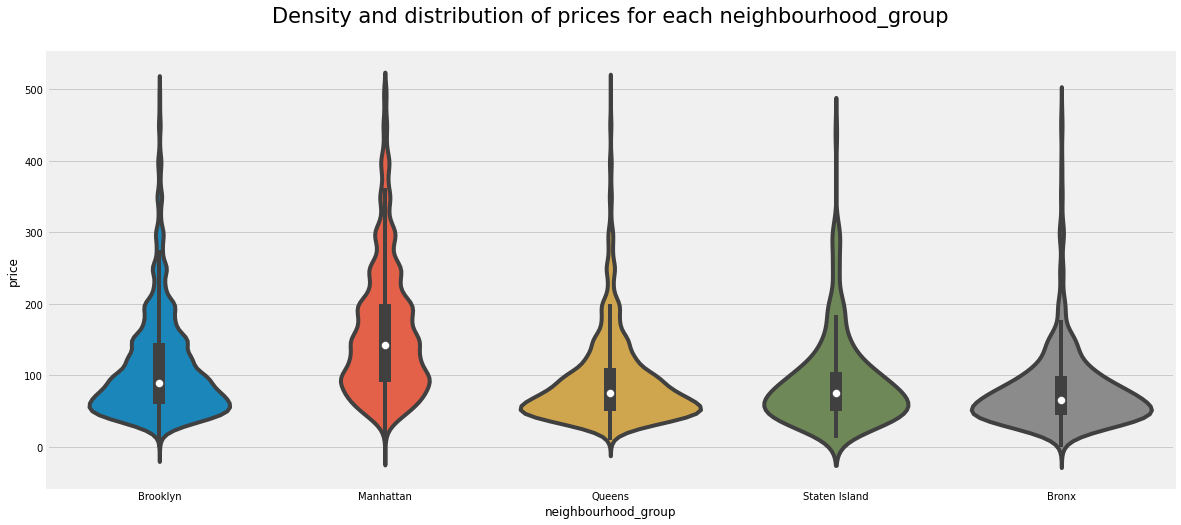

In [279]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(18,8))
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group\n',size=21)

In [280]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [281]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

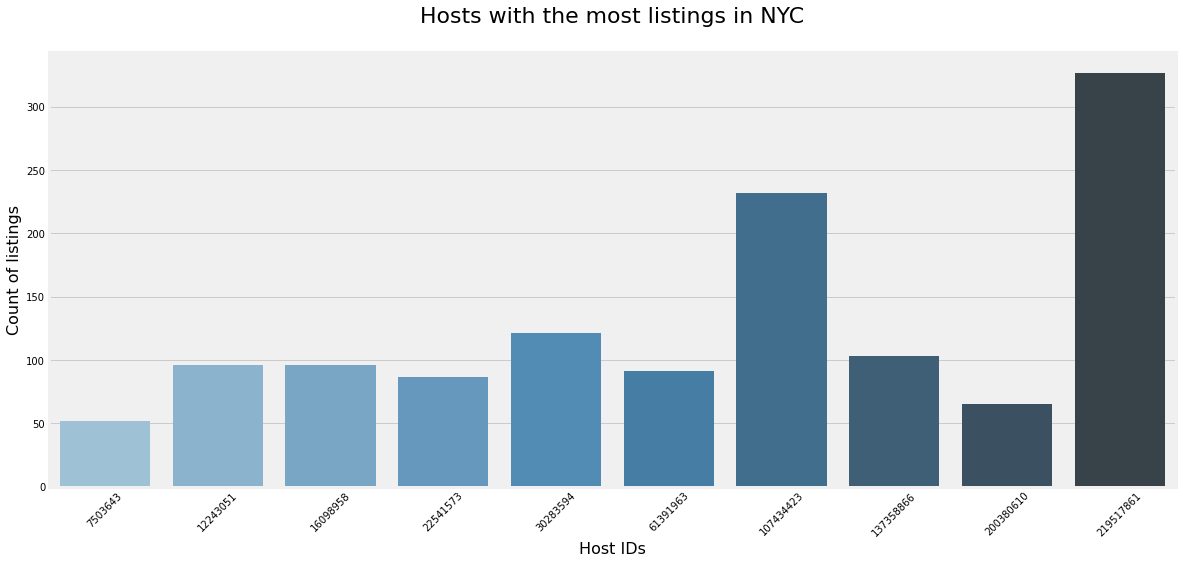

In [282]:
plt.figure(figsize=(18,8))
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC\n',size=22)
viz_1.set_ylabel('Count of listings',size=16)
viz_1.set_xlabel('Host IDs',size=16)
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Neighbourhood Group\n')

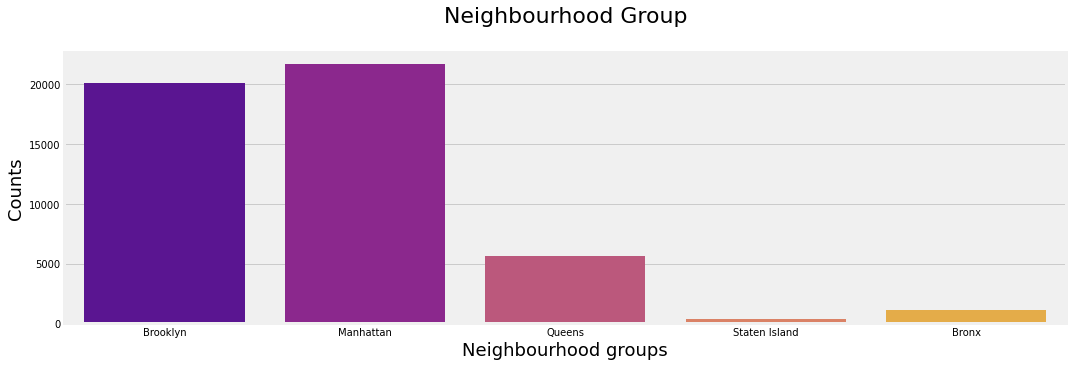

In [283]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.xlabel('Neighbourhood groups',size=18)
plt.ylabel('Counts',size=18)
plt.title('Neighbourhood Group\n',size=22)

Text(0.5, 1.0, 'Room availability with respect to neighbourhood groups\n')

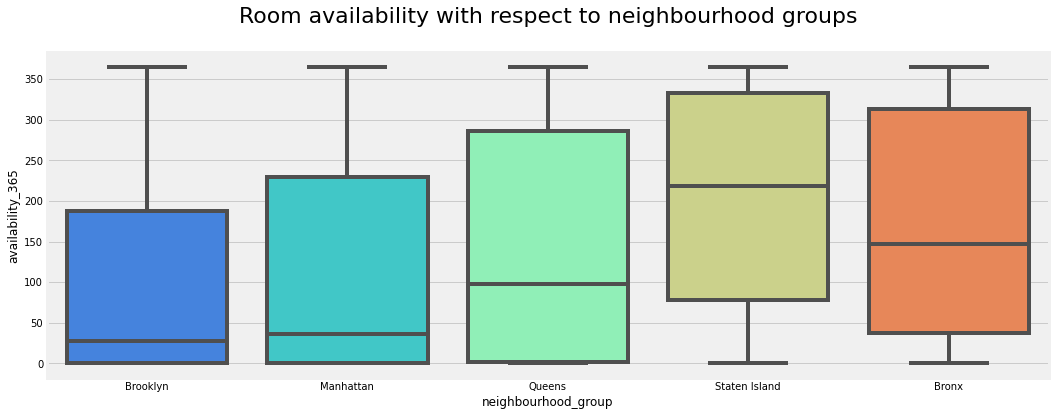

In [284]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='rainbow')
plt.title("Room availability with respect to neighbourhood groups\n",size=22)

Text(0.5, 1.0, 'Mininmum night stays in AirBNB hotels')

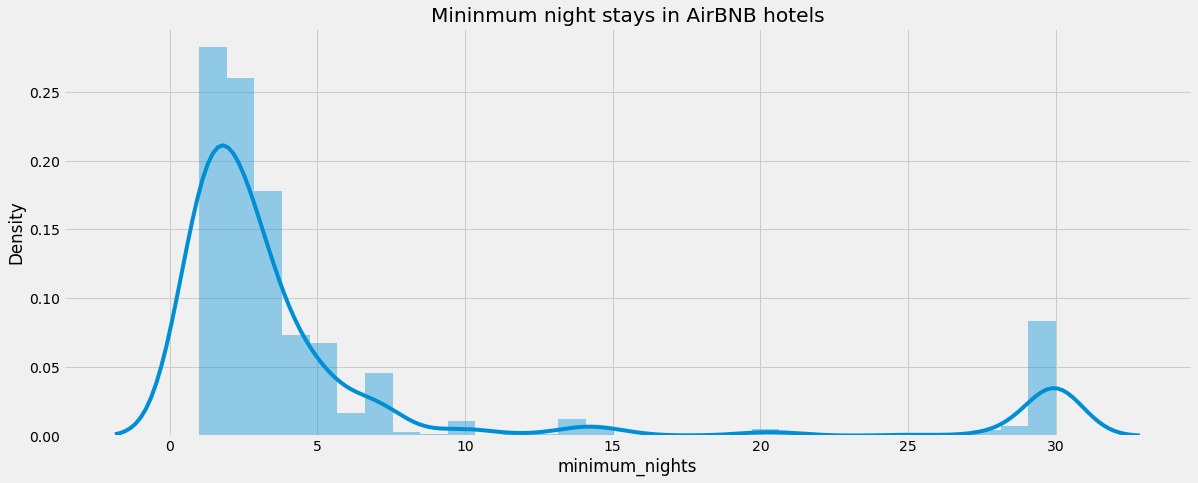

In [295]:
plt.figure(figsize=(18,7))
sns.distplot(airbnb[(airbnb['minimum_nights'] <= 30) & (airbnb['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()
plt.title("Mininmum night stays in AirBNB hotels")

Text(0.5, 1.0, 'Map of neighbourhood groups\n')

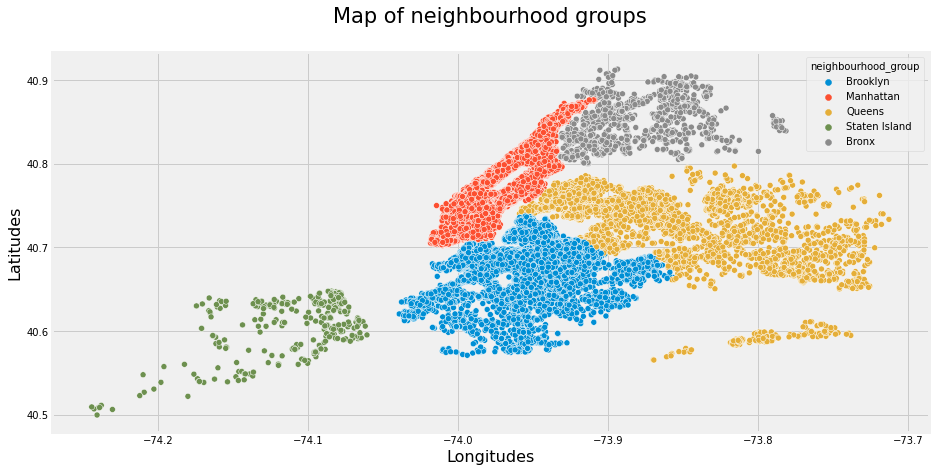

In [285]:
plt.figure(figsize=(14,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()
plt.xlabel('Longitudes',size=16)
plt.ylabel('Latitudes',size=16)
plt.title("Map of neighbourhood groups\n",size=21)

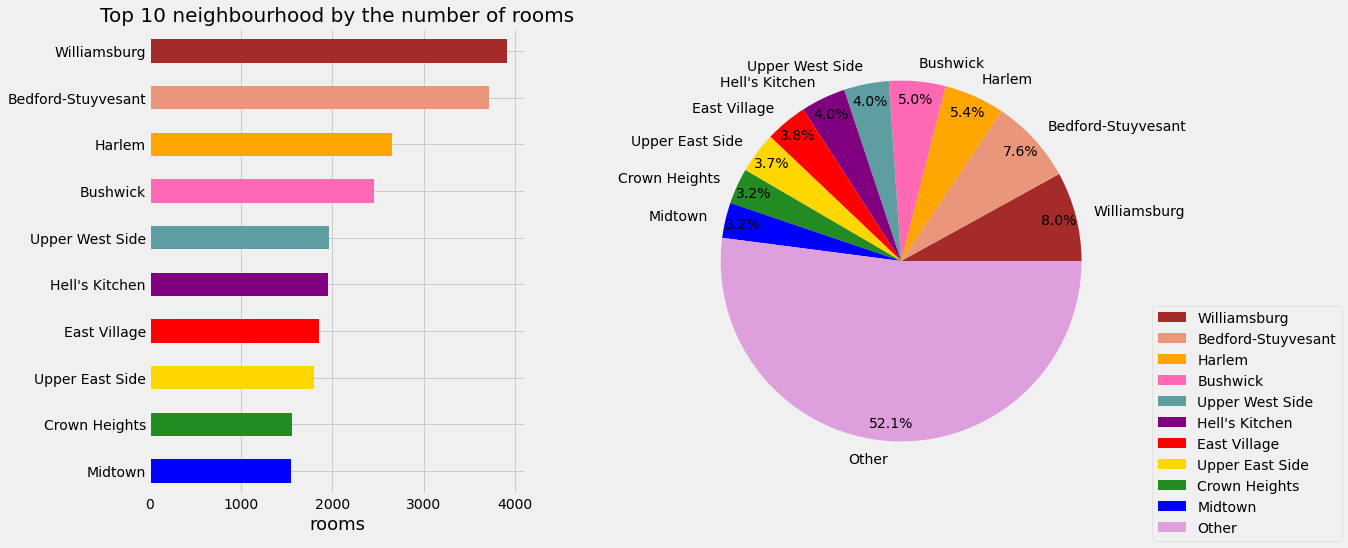

In [286]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
airbnb.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=airbnb['neighbourhood'].value_counts()
groups=list(airbnb['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

Text(0.5, 1.0, 'Unique Neighbourhood Counts\n')

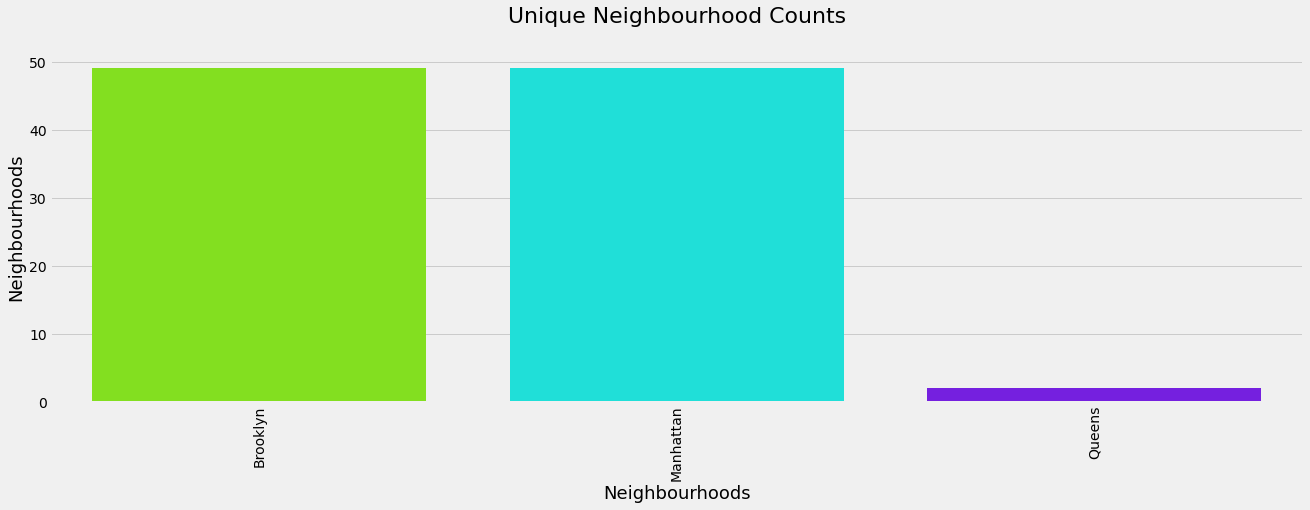

In [287]:
df = airbnb
sns.countplot(df.iloc[:100,2], palette="hsv")
fig = plt.gcf()
fig.set_size_inches(20,6)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhoods',size=18)
plt.ylabel('Neighbourhoods',size=18)
plt.title('Unique Neighbourhood Counts\n',size=22)

Text(0.5, 1.0, 'Online booking stats of rooms\n')

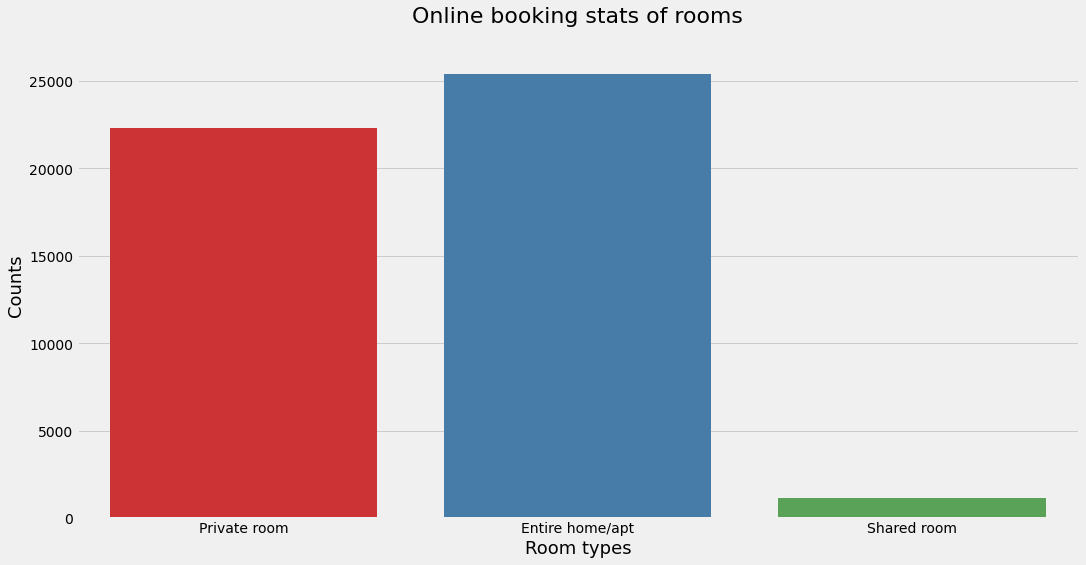

In [288]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="Set1")
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.xlabel('Room types',size=18)
plt.ylabel('Counts',size=18)
plt.title('Online booking stats of rooms\n',size=22)

Text(0.5, 1.0, 'Map of room types\n')

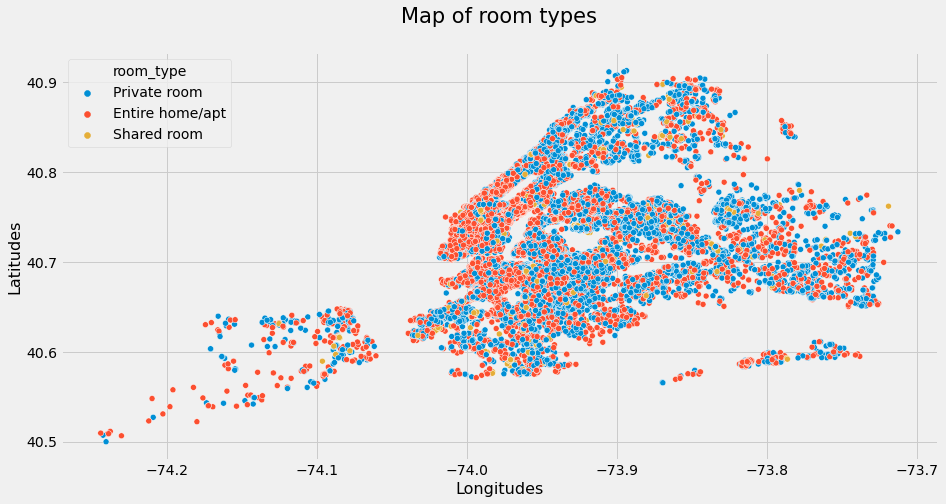

In [289]:
plt.figure(figsize=(14,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()
plt.xlabel('Longitudes',size=16)
plt.ylabel('Latitudes',size=16)
plt.title("Map of room types\n",size=21)

Text(0.5, 1.0, 'Map of room availability\n')

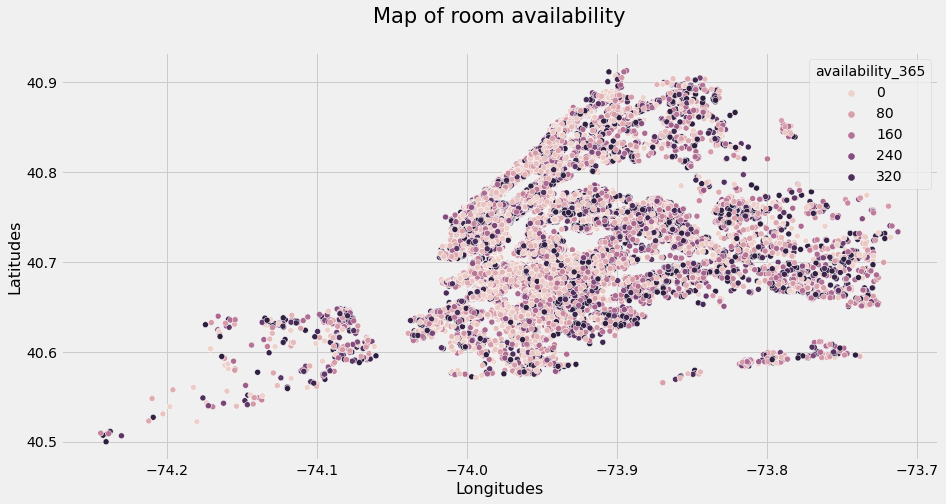

In [290]:
plt.figure(figsize=(14,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()
plt.xlabel('Longitudes',size=16)
plt.ylabel('Latitudes',size=16)
plt.title("Map of room availability\n",size=21)

In [291]:
from wordcloud import WordCloud

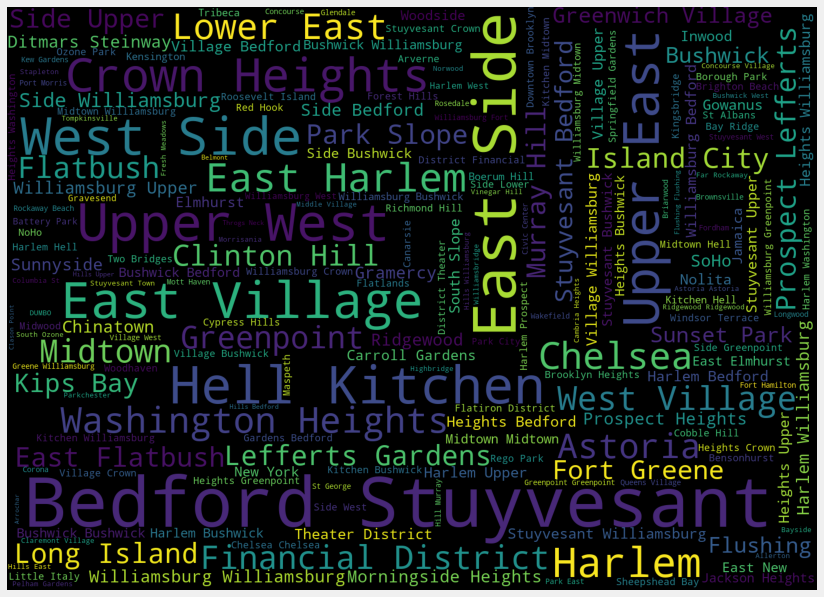

In [292]:
plt.subplots(figsize=(25,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1500,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()